In [1]:
import yfinance as yf
import os
import stocksymbol
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta

api_key = "02e8b3a5-c324-4c18-a273-a8bfb1513167"
ss = stocksymbol.StockSymbol(api_key)

On exporte ensuite tous les symboles

In [2]:
symbols = ss.get_symbol_list(market="america", symbols_only = True)

In [3]:
index = pd.DataFrame(symbols[:], columns = ['Symbols'])

On crée un index de date

In [4]:

start_date = datetime.strptime('2020-05-04', '%Y-%m-%d')
end_date = datetime.strptime('2022-07-01', '%Y-%m-%d')


num_days = (end_date-start_date).days + 1
dates = []
for i in range(num_days):
    day = start_date + timedelta(days=i)
    dates.append(date.strftime(day, '%Y-%m-%d'))

In [113]:
print(len(dates))

424


In [5]:
idx_min = 0
idx_max = 10
index = [idx_min]
index_date = []
period = "8mo"

stocks = pd.DataFrame(yf.Ticker(symbols[idx_min]).history(start = start_date+timedelta(1) ,end = end_date + timedelta(1) ))
stocks.reset_index(inplace=True)
stocks['Date'] = stocks['Date'].astype('str')

for k in range(len(dates)) :
    if dates[k] in np.array(stocks['Date']) : 
        index_date.append(k)

stocks.index = index_date

stocks.insert(stocks.shape[1], "idx_name", [idx_min for k in range(stocks.shape[0])])
for k in range(len(dates)) : 
   
    if k not in index_date : 
        new_line = []

        for column in stocks.columns : 
            if column != 'Date' and column != 'idx_name' : 
                new_line.append((stocks[column][k-1]+stocks[column][stocks.index[k]])/2)
            
            else : 
                if column == 'Date' :
                    new_date = datetime.strptime(stocks['Date'][stocks.index[0]],'%Y-%m-%d')+timedelta(int(k-stocks.index[0]))
                    new_line.append(datetime.strftime(new_date,  '%Y-%m-%d')) 
                else : 
                    new_line.append(stocks['idx_name'][index_date[0]])


        stocks.loc[k] = new_line
        stocks.sort_index(inplace=True)

max_values = []

for column in stocks.columns : 
        if column != "idx_name" and  column != 'Date' : 
            stocks[column] =  stocks[column] / stocks[column].max()
            max_values.append(stocks[column].max())

for i in range(idx_min+1, idx_max+1) : 

    s2 = pd.DataFrame(yf.Ticker(symbols[i]).history(start = start_date+timedelta(1), end = end_date + timedelta(1)))
    if s2.shape[0]>0 :
        if datetime.strftime(s2.index[0], '%Y-%m-%d' ) == dates[0]: 
            index.append(i)
            s2.reset_index(inplace=True)
            s2['Date'] = s2['Date'].astype('str')

            index_date = []

            for k in range(len(dates)) : 
                if  dates[k] in np.array(s2['Date']) : 
                    index_date.append(k)
            s2.index = index_date

            for column in s2.columns : 
                if column != "idx_name" and column != 'Date':
                    s2[column] =  s2[column] / s2[column].max()
                    max_values.append(s2[column].max())

            s2.insert(s2.shape[1], "idx_name", [i for k in range(s2.shape[0])])

            for k in range(len(dates)) : 
                if k not in index_date : 
                    new_line = []

                    for column in stocks.columns : 
                        if column != 'Date' and column != 'idx_name' : 
                            new_line.append((s2[column][k-1]+s2[column][s2.index[k]])/2)
                        
                        else : 
                            if column == 'Date' :
                                new_date = datetime.strptime(s2['Date'][s2.index[0]],'%Y-%m-%d')+timedelta(int(k-s2.index[0]))
                                new_line.append(datetime.strftime(new_date,  '%Y-%m-%d')) 
                            else : 
                                new_line.append(s2['idx_name'][index_date[0]])

                    s2.loc[k] = new_line
                    s2.sort_index(inplace=True)

            
            stocks = pd.concat([stocks, s2])


- BRK.B: No data found, symbol may be delisted
- BRK.A: No data found, symbol may be delisted


In [8]:
stocks.to_csv('D:\machine_learning\stocks_exchange\data_stocks.csv')

In [6]:
def match_date(stocks_by_date : pd.DataFrame, data): 
   
    dates = np.unique(stocks_by_date['Date'])
    Xf = []
    X_plot = pd.DataFrame([], columns = stocks_by_date.columns)

    for date in dates : 
        lines = stocks_by_date[stocks_by_date['Date']==date]
        Xf.append(lines[data])
        X_plot = pd.concat([X_plot, lines])

    return Xf, X_plot.reset_index(drop = True)

Xs, X_plot = match_date(stocks, data = ['Open', 'High','Low', 'Close', 'Volume'])

In [ ]:
print(Xs)

[       Open      High       Low     Close    Volume
0  0.200416  0.200376  0.202788  0.200903  0.189105
0  0.203336  0.202103  0.203723  0.205884  0.119718
0  0.315086  0.315710  0.317135  0.315734  0.153440
0  0.321243  0.321485  0.324250  0.322607  0.158855
0  0.254864  0.256499  0.258075  0.258736  0.152575
0  0.056910  0.057680  0.057453  0.057729  0.133962
0  0.444954  0.444072  0.444260  0.440682  0.064469
0  0.132673  0.129882  0.137663  0.134161  0.170354
0  0.240037  0.233549  0.242436  0.240316  0.052234
0  0.499817  0.499813  0.500871  0.497668  0.223573
0  0.667462  0.669554  0.669324  0.670044  0.061730
0  0.412752  0.408588  0.412609  0.409748  0.108047
0  0.367618  0.369812  0.369625  0.372018  0.083563
0  0.359716  0.357900  0.361909  0.359989  0.139044
0  0.473301  0.473053  0.478815  0.475606  0.293586
0  0.482826  0.484116  0.486698  0.483479  0.118518
0  0.497436  0.495553  0.499937  0.497162  0.185544
0  0.355314  0.348993  0.354427  0.349610  0.215927
0  0.536676

In [7]:
look_back = 10
def convert_Xy(X,look_back) :
    xtrain = []
    ytrain = []
    
    for k in range(len(X)-look_back) :
        time_series = []
        
        for j in range(k,k + look_back) :
            tickets = [X[j].iloc[[r]].to_numpy().flatten() for r in range(X[j].shape[0])]
            time_series.append(tickets)        
        ytrain.append([X[k+look_back].iloc[[r]]for j in range(len(data)//(num_station)-look) for r in range(X[k+look_back].shape[0])])
        xtrain.append(time_series)
    
    return np.array(xtrain),  np.array(ytrain)

X_processed, y_processed = convert_Xy(Xs, look_back)
    

In [8]:
split_time = int(X_processed.shape[0]*2/3)

Xtrain, Xtest = X_processed[:split_time], X_processed[split_time:]
ytrain, ytest = y_processed[:split_time], y_processed[split_time:]
X_tot, y_tot = X_processed, y_processed

def reshape(X,y) :

    yf = np.zeros((X.shape[0], y.shape[1]*y.shape[2]))
    Xf = np.zeros((X.shape[0], X.shape[1], X.shape[2]*X.shape[3]))

    for k in range(X.shape[0]) :
        for j in range(X.shape[1]) : 
            Xf[k][j] = X[k][j].flatten() 
        yf[k] = y[k].flatten()
    return Xf,yf

Xtrain, ytrain = reshape(Xtrain, ytrain)
Xtest, ytest = reshape(Xtest, ytest)
X_tot, y_tot = reshape(X_tot, y_tot)

print(Xtrain.shape, ytrain.shape)

(519, 10, 45) (519, 45)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, LSTM
from keras.losses import MeanSquaredError


PS = Sequential()
PS.add(Input((Xtrain.shape[1],Xtrain.shape[2])))
PS.add(LSTM(128))
PS.add(Dense(Xtrain.shape[2], activation = 'sigmoid'))


In [39]:
PS.compile(loss= MeanSquaredError(), optimizer= "adam", metrics=['mean_squared_error'])

In [40]:
PS.fit(Xtrain, ytrain, epochs = 16,batch_size=2,  validation_data=(Xtest, ytest))

Epoch 1/16
260/260 [==============================] - 4s 9ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 2/16
260/260 [==============================] - 2s 8ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 3/16
260/260 [==============================] - 2s 7ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 4/16
260/260 [==============================] - 2s 7ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 5/16
260/260 [==============================] - 2s 8ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 6/16
260/260 [==============================] - 2s 7ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 7/16
260/260 [========

In [47]:
PS.save('D:\machine_learning\stocks_exchange\model_1')

INFO:tensorflow:Assets written to: D:\machine_learning\stocks_exchange\model_1\assets


In [41]:
ypred = PS.predict(X_tot)

25/25 [==============================] - 1s 5ms/step


In [ ]:
print(y_tot.shape)

(1597, 245)


In [42]:
def re_reshape(y) : 
    yf = np.zeros((y.shape[0], y_processed.shape[1], y_processed.shape[2]))
    for k in range(y.shape[0]) : 
        for j in range(y.shape[1]) : 
            yf[k][j//y_processed.shape[2]][j%y_processed.shape[2]] = y[k][j]
    return yf


ypred = re_reshape(ypred)
print(ypred.shape)
y_index1 = []

for k in range(ypred.shape[0]) : 
    for j in range(ypred.shape[1]) :
            columns1 = np.append(ypred[k, j],index[j])
            y_index1.append(columns1)
y_fpred = pd.DataFrame(y_index1, columns = ['Open', 'High', 'Low', 'Close', 'Volume', "idx_name"])


(779, 9, 5)


In [111]:
print(y_fpred)

          Open      High       Low     Close    Volume  idx_name
45    0.717196  0.723287  0.730385  0.724635  0.453130       0.0
46    0.741930  0.732962  0.730436  0.730199  0.297177       1.0
47    0.802750  0.804026  0.800681  0.801500  0.305603       2.0
48    0.779475  0.789711  0.789262  0.791455  0.252442       3.0
49    0.875254  0.881166  0.880717  0.883876  0.301896       4.0
...        ...       ...       ...       ...       ...       ...
3811  0.691554  0.706689  0.681554  0.654075  0.344929       4.0
3812  0.619265  0.646569  0.628737  0.629664  0.483586       5.0
3813  0.597561  0.627429  0.613799  0.629117  0.341712       6.0
3814  0.572794  0.557527  0.578677  0.574869  0.616784       9.0
3815  0.776793  0.786321  0.769201  0.777424  0.203116      10.0

[3771 rows x 6 columns]


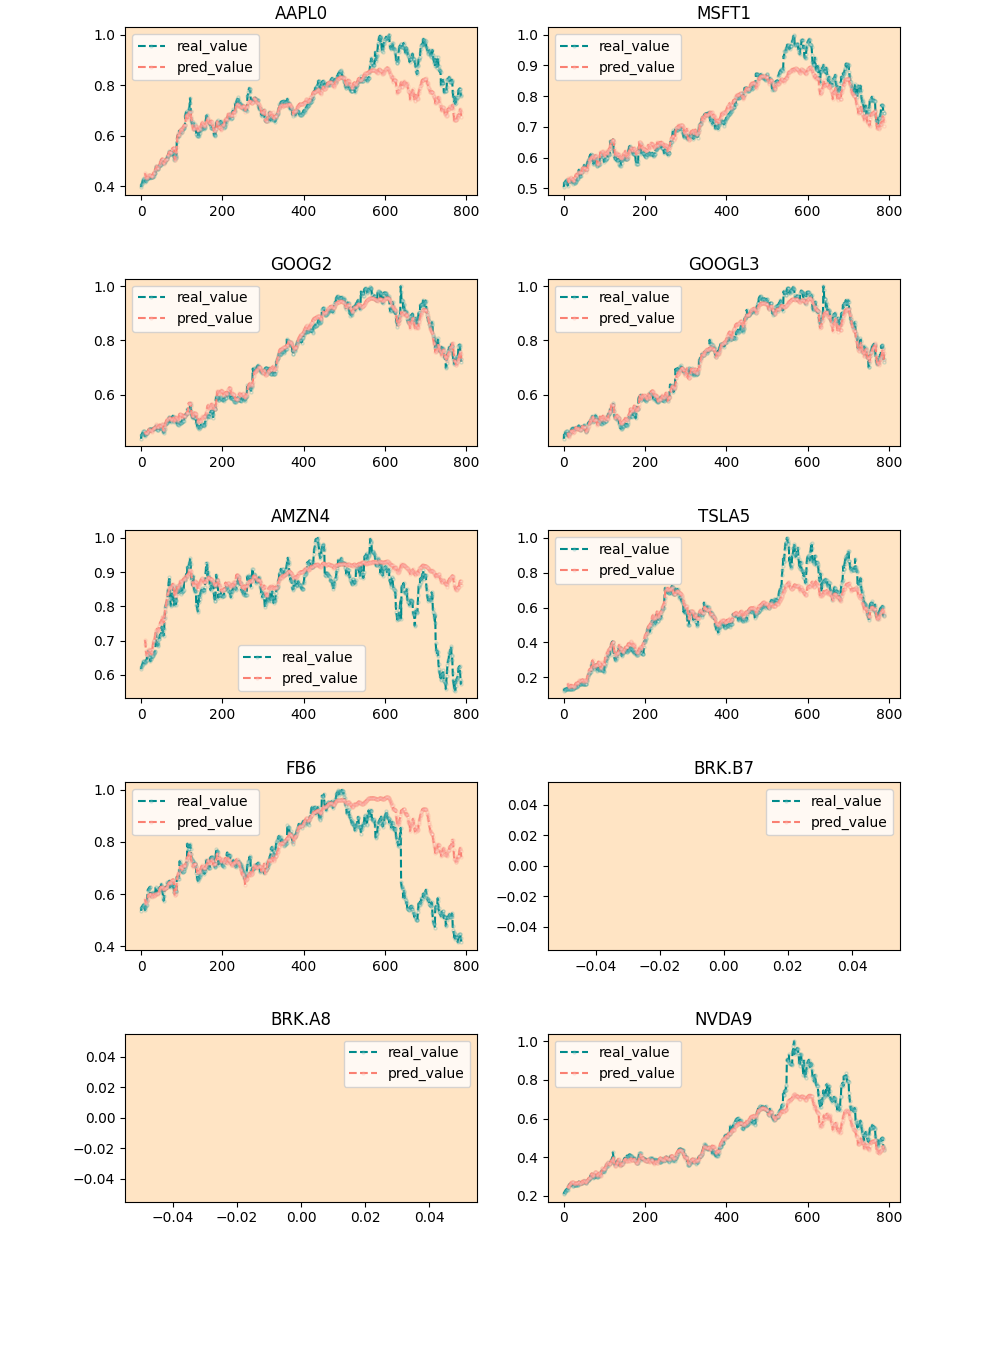

In [43]:
import matplotlib.pyplot as plt

%matplotlib widget

fig, axs = plt.subplots((idx_max-idx_min+1)//2, 2, num = period, figsize = (10, len(index)*30/20))
plt.subplots_adjust(hspace=0.5, top = 0.98)

i = idx_min
stocks = stocks.reset_index(drop = True)
for k in range(len(axs)) : 
    for j in range(len(axs[k])) :

        axs[k][j].cla()
        stock_x = X_plot[X_plot["idx_name"] == i]
        stock_y = y_fpred[y_fpred["idx_name"]==i]

        if len(stock_x.index) > 0 : 
            stock_x.index = range(len(dates))
            stock_y.index = range(look_back, len(dates))
        axs[k][j].set_facecolor('bisque')
        axs[k][j].plot(stock_x["High"], marker = "o", linestyle = '--', markersize = 2, markerfacecolor=(1, 1, 1, 0.2), color = 'darkcyan', label = 'real_value')

        axs[k][j].plot(stock_y["High"], marker = "o", linestyle = '--', markersize = 2, markerfacecolor=(1, 1, 1, 0.2),color = 'salmon', label = 'pred_value')
        axs[k][j].set_title(symbols[i]+ str(i))

        axs[k][j].legend(loc = 'best')
        i += 1

In [ ]:
def reshape_prediction(y) :

    yf = np.zeros((y.shape[0], look_back, y.shape[1], y.shape[2]))
    for k in range(y.shape[0]) :
        for j in range(look_back) :
            for i in range(y.shape[1]):
                yf[k][j][i] = y[k][i]
    return yf

print(reshape_prediction(ypred).shape)


(63, 3, 49, 5)


In [ ]:
def predict_day(num_day, ypred) :

    data = [] 
    for k in range(num_day) :
        X = reshape_prediction(ypred)
        ypred = PS.predict(X)
       
        data.append(ypred[-1])
    
    return data
